<a href="https://colab.research.google.com/github/gmkumar1988/Data-Analytics-Projects/blob/main/natural_language_processing_amazon_reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [71]:
!pip install nlp

In [72]:
%matplotlib inline

import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nlp
import random


def show_history(h):
    epochs_trained = len(h.history['loss'])
    plt.figure(figsize=(16, 6))

    plt.subplot(1, 2, 1)
    plt.plot(range(0, epochs_trained), h.history.get('accuracy'), label='Training')
    plt.plot(range(0, epochs_trained), h.history.get('val_accuracy'), label='Validation')
    plt.ylim([0., 1.])
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(range(0, epochs_trained), h.history.get('loss'), label='Training')
    plt.plot(range(0, epochs_trained), h.history.get('val_loss'), label='Validation')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()


def show_confusion_matrix(y_true, y_pred, classes):
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y_true, y_pred, normalize='true')

    plt.figure(figsize=(8, 8))
    sp = plt.subplot(1, 1, 1)
    ctx = sp.matshow(cm)
    plt.xticks(list(range(len(classes))), labels=classes)
    plt.yticks(list(range(len(classes))), labels=classes)
    plt.colorbar(ctx)
    plt.show()


print('Using TensorFlow version', tf.__version__)

Using TensorFlow version 2.18.0


In [73]:
amazon_data = pd.read_csv('/content/amazon_reviews.csv', header=None)
amazon_data.head()

/tmp/ipython-input-2812497319.py:1: DtypeWarning: Columns (3,4) have mixed types. Specify dtype option on import or set low_memory=False.
  amazon_data = pd.read_csv('/content/amazon_reviews.csv', header=None)


,0,1,2,3,4,5,6,7
0,reviewId,userName,content,score,thumbsUpCount,reviewCreatedVersion,at,appVersion
1,032bcafa-54e0-4eb5-9e43-c86f8c5ac5e0,Garry Gordon,perfect,5,0,30.14.0.100,2025-08-04 12:33:57,30.14.0.100
2,9109695d-0b7d-48aa-a5a8-232e3978c7be,Marcia Chapman,you make it EXTREMELY IMPOSSIBLE to find and p...,1,0,30.14.0.100,2025-08-04 11:46:54,30.14.0.100
3,d329bbac-b2e2-40a8-bcec-1dea9aa35233,DominicJ Romero,Thanks for sharing,4,0,30.14.0.100,2025-08-04 10:31:01,30.14.0.100
4,c07a7bd2-79f9-4fbf-8599-f7ba1eb0e867,John Hulme,bril,5,0,30.14.0.100,2025-08-04 09:35:44,30.14.0.100


In [74]:
new_header = amazon_data.iloc[0]
amazon_data = amazon_data[1:]
amazon_data.columns = new_header
amazon_data.head()

,reviewId,userName,content,score,thumbsUpCount,reviewCreatedVersion,at,appVersion
1,032bcafa-54e0-4eb5-9e43-c86f8c5ac5e0,Garry Gordon,perfect,5,0,30.14.0.100,2025-08-04 12:33:57,30.14.0.100
2,9109695d-0b7d-48aa-a5a8-232e3978c7be,Marcia Chapman,you make it EXTREMELY IMPOSSIBLE to find and p...,1,0,30.14.0.100,2025-08-04 11:46:54,30.14.0.100
3,d329bbac-b2e2-40a8-bcec-1dea9aa35233,DominicJ Romero,Thanks for sharing,4,0,30.14.0.100,2025-08-04 10:31:01,30.14.0.100
4,c07a7bd2-79f9-4fbf-8599-f7ba1eb0e867,John Hulme,bril,5,0,30.14.0.100,2025-08-04 09:35:44,30.14.0.100
5,5a600712-8e68-4334-9cfe-16f275d8ccfe,Royce Miller,there's no way to talk directly with an agent....,1,0,30.14.0.100,2025-08-04 09:30:15,30.14.0.100


In [75]:
amazon_data.columns

Index(['reviewId', 'userName', 'content', 'score', 'thumbsUpCount',
       'reviewCreatedVersion', 'at', 'appVersion'],
      dtype='object', name=0)

In [76]:
amazon_data.shape

(77129, 8)

In [77]:
amazon_data.ndim

2

In [78]:
amazon_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77129 entries, 1 to 77129
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              77129 non-null  object
 1   userName              77123 non-null  object
 2   content               77123 non-null  object
 3   score                 77129 non-null  object
 4   thumbsUpCount         77129 non-null  object
 5   reviewCreatedVersion  68454 non-null  object
 6   at                    77129 non-null  object
 7   appVersion            68454 non-null  object
dtypes: object(8)
memory usage: 4.7+ MB


In [79]:
amazon_data.describe()

,reviewId,userName,content,score,thumbsUpCount,reviewCreatedVersion,at,appVersion
count,77129,77123,77123,77129,77129,68454,77129,68454
unique,75594,63794,74110,10,666,254,76961,254
top,42104c7f-ba02-4f1d-8e63-755c438a1585,A Google user,Good,1,0,28.13.6.100,2025-05-14 10:22:59,28.13.6.100
freq,11,7819,294,30591,38579,2035,14,2035


In [80]:
amazon_data.head(20)

,reviewId,userName,content,score,thumbsUpCount,reviewCreatedVersion,at,appVersion
1,032bcafa-54e0-4eb5-9e43-c86f8c5ac5e0,Garry Gordon,perfect,5,0,30.14.0.100,2025-08-04 12:33:57,30.14.0.100
2,9109695d-0b7d-48aa-a5a8-232e3978c7be,Marcia Chapman,you make it EXTREMELY IMPOSSIBLE to find and p...,1,0,30.14.0.100,2025-08-04 11:46:54,30.14.0.100
3,d329bbac-b2e2-40a8-bcec-1dea9aa35233,DominicJ Romero,Thanks for sharing,4,0,30.14.0.100,2025-08-04 10:31:01,30.14.0.100
4,c07a7bd2-79f9-4fbf-8599-f7ba1eb0e867,John Hulme,bril,5,0,30.14.0.100,2025-08-04 09:35:44,30.14.0.100
5,5a600712-8e68-4334-9cfe-16f275d8ccfe,Royce Miller,there's no way to talk directly with an agent....,1,0,30.14.0.100,2025-08-04 09:30:15,30.14.0.100
6,bd9f353b-cfc2-439c-8310-5da159b40bd6,Capt. jack sparrow,best of the best,5,0,30.14.0.100,2025-08-04 09:26:54,30.14.0.100
7,0e94af65-c11a-4c82-84e5-8e9d5b61a494,Nicholas Carter,"Amazon rules, sometimes......",5,0,30.14.0.100,2025-08-04 09:09:27,30.14.0.100
8,be9a7603-5cf6-4fc1-ac29-8ff569a1ecc0,Tyler Kelley,19 items i paid to have delivered the next day...,2,0,30.14.0.100,2025-08-04 08:49:13,30.14.0.100
9,4941ec19-8365-4736-a832-3d33a6ef0f28,Amrit Raythere223,"it's really bad and poor service, no one respo...",1,0,NaN,2025-08-04 08:32:48,NaN
10,db88245a-2642-4630-a580-1880c2757cf0,Haseeb Ahmad,no 1 prodect you send me insha alla,5,0,30.14.0.100,2025-08-04 07:46:11,30.14.0.100


In [81]:
amazon_data_train = amazon_data.sample(frac=0.8, random_state=25)

In [82]:
print("No. of training samples: ", amazon_data_train.shape[0])

No. of training samples:  61703


In [83]:
amazon_data_train.head()

,reviewId,userName,content,score,thumbsUpCount,reviewCreatedVersion,at,appVersion
27493,8924ddb3-1477-4be9-accb-48208f8c3fdc,Phil Wells,The app is ok and to be honest the customer se...,2,19,28.4.0.100,2024-03-03 19:23:52,28.4.0.100
29435,94ad1051-f3e4-4457-99d8-07f90ece3cce,Jason B,Pretty much done. As Amazon continues to add f...,1,1,28.3.0.100,2024-02-12 05:32:24,28.3.0.100
67392,5c6b23a7-2612-4f4a-9263-32ca155cdf65,Dorthy Cotner,Amazon has always delivered on time. Returns a...,5,0,26.15.0.100,2023-08-26 15:56:26,26.15.0.100
64456,ebf3efe7-e9d5-4059-b044-b556d7103053,Tünde Toth,The crashes I'm unable to open it since yester...,1,0,22.6.0.100,2021-03-23 08:29:10,22.6.0.100
63281,a9377dcc-0865-428b-bbe0-6ecfbeb20aa9,moo dubose,Everytime I search for any book the first opti...,2,0,24.22.0.100,2022-12-31 05:38:05,24.22.0.100


In [84]:
amazon_data_test = amazon_data.drop(amazon_data_train.index)

In [85]:
print("No. of testing samples: ", amazon_data_test.shape[0])

No. of testing samples:  15426


In [86]:
amazon_data_test.head()

,reviewId,userName,content,score,thumbsUpCount,reviewCreatedVersion,at,appVersion
21,e00281cc-7fa8-4286-ba8b-203035a8f514,Michael Bidwell,Shes my mistress for christmas,5,0,30.14.0.100,2025-08-04 02:23:37,30.14.0.100
22,24847c0a-935c-4a3b-a6c6-5fc156ed4d08,Natalia Zvonitskaia,"buy a lot ,very usefull",5,0,30.14.0.100,2025-08-04 01:14:15,30.14.0.100
23,ef4f2bc4-8054-4f37-a32a-2488177480c3,T Rabbitmom,very easy & convenient,5,0,30.14.0.100,2025-08-04 00:36:44,30.14.0.100
30,b1ada782-c457-4687-9a25-1b2e247fcfe9,Linda Dugre,Easy ordering and many choices,5,0,30.14.0.100,2025-08-03 11:59:42,30.14.0.100
50,6c0412ea-a414-422d-9ce7-11db4743ee14,Tamika Warren,good morning,5,0,30.11.0.100,2025-08-03 03:06:46,30.11.0.100


In [87]:
amazon_data_train['content'].head()

,content
27493,The app is ok and to be honest the customer se...
29435,Pretty much done. As Amazon continues to add f...
67392,Amazon has always delivered on time. Returns a...
64456,The crashes I'm unable to open it since yester...
63281,Everytime I search for any book the first opti...


In [88]:
amazon_data_test['content'].head()

,content
21,Shes my mistress for christmas
22,"buy a lot ,very usefull"
23,very easy & convenient
30,Easy ordering and many choices
50,good morning


In [89]:
def get_review(data):
  reviews = [x['text'] for x in data]
  return reviews

In [90]:
train_amazon_reviews = amazon_data_train['content']
test_amazon_reviews = amazon_data_test['content']

In [91]:
train_amazon_reviews.iloc[20]

"I HATE your new filter. It's slow. It's Not intuitive. It's medevil. It doesn't produce results any better than if i did it on my own. Your search results typically are not even relevant to what I'm looking for. I could pay the neighbor kid five bucks to walk to the store and buy what I need faster. I used to spend 75% of my shopping budget with Amazon but now, I don't even spend 10%. Not the Amazon cares because they aren't responding or doing anything to change."

In [92]:
test_amazon_reviews.iloc[30]

'Enjoy using app'

Create Tokenizer

In [93]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [94]:
tokenizer = Tokenizer(num_words=10000, oov_token='<UNK>')
tokenizer.fit_on_texts(train_amazon_reviews.fillna(''))

In [95]:
train_amazon_reviews.iloc[0]

'The app is ok and to be honest the customer service is great, my issue is the delivery drivers. So many times a package gets delivered to a neighbour or somewhere completely different even though I have put a full description of where my property is and how to get to it, very poor service.'

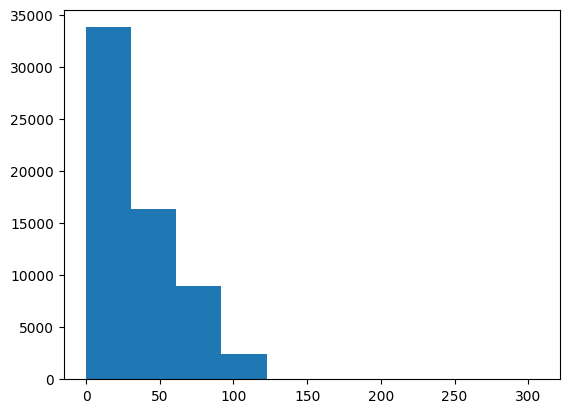

In [96]:
lengths_train = [t.split() for t in train_amazon_reviews.fillna('')]
plt.hist([len(t) for t in lengths_train])
plt.show()

In [97]:
max_length = 130

from tensorflow.keras.preprocessing.sequence import pad_sequences

In [98]:
def get_sequences(tokenizer, reviews):
  sequences = tokenizer.texts_to_sequences(reviews)
  padded_sequences = pad_sequences(sequences, truncating='post', maxlen=max_length)
  return padded_sequences

In [99]:
padded_train_amazon_reviews = get_sequences(tokenizer, train_amazon_reviews.fillna(''))
padded_test_amazon_reviews = get_sequences(tokenizer, test_amazon_reviews.fillna(''))

In [100]:
padded_train_amazon_reviews[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    2,    8,
          9,  526,    5,    3,   30, 1116,    2,   60,   46,    9,   64,
         11,  182,    9,    2,   52,  486,   25,  154,  130,    7,  181,
        358,  144,    3,    7, 4651,   31, 1055,  364,  253,   57,  328,
          4,   17,  235,    7,  481, 1060,   13,  191,   11, 2967,    9,
          5,  128,    3,   27,    3,    6,   59,  427,   46], dtype=int32)

In [101]:
padded_test_amazon_reviews[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   1,  11,   1,  12, 666],
      dtype=int32)

Preparing the labels

In [102]:
train_classes = amazon_data_train['score']
test_classes = amazon_data_test['score']

In [103]:
train_classes

,score
27493,2
29435,1
67392,5
64456,1
63281,2
...,...
29209,1
8733,4
64237,1
27272,2


In [104]:
test_classes

,score
21,5
22,5
23,5
30,5
50,5
...,...
77082,5
77098,1
77105,1
77117,1


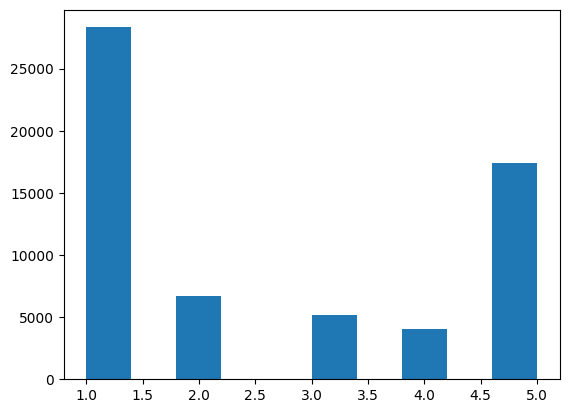

In [105]:
train_classes_numeric = pd.to_numeric(train_classes, errors='coerce').dropna()
plt.hist(train_classes_numeric)
plt.show()

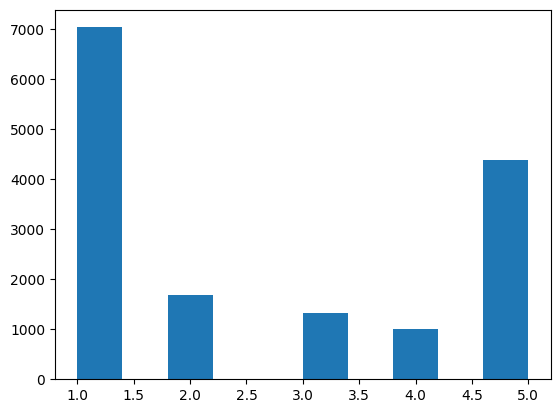

In [106]:
test_classes_numeric = pd.to_numeric(test_classes, errors='coerce').dropna()
plt.hist(test_classes_numeric)
plt.show()

In [107]:
class_to_index = dict((c, i) for i, c in enumerate(set(train_classes_numeric)))
class_to_index


{1: 0, 2: 1, 3: 2, 4: 3, 5: 4}

In [108]:
index_to_class = dict((v, k) for k, v in class_to_index.items())
index_to_class

{0: 1, 1: 2, 2: 3, 3: 4, 4: 5}

Creation of Model

In [109]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(10000, 16, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(20, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(20)),
    tf.keras.layers.Dense(5, activation='softmax') # Change to 5 units and softmax for multi-class
])

model.compile(
    loss='sparse_categorical_crossentropy', # Change loss for integer labels
    optimizer='adam',
    metrics=['accuracy']
)

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_4 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_5 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Train the Model

In [110]:
val_reviews_train = amazon_data_train['score']


In [111]:
val_reviews_train.head()

,score
27493,2
29435,1
67392,5
64456,1
63281,2


In [112]:
val_sequence_train = get_sequences(tokenizer, train_amazon_reviews.fillna(''))

In [113]:
val_labels_train = np.array([class_to_index[score] for score in train_classes_numeric])

In [114]:
val_reviews_train.iloc[0],val_labels_train[0]

('2', np.int64(1))

In [115]:
h = model.fit(
    padded_train_amazon_reviews,
    val_labels_train,
    validation_data=(padded_test_amazon_reviews, test_labels), # Use test_labels instead of test_classes_numeric
    epochs=10,
    callbacks= [tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=2)]
)

Epoch 1/10
1929/1929 ━━━━━━━━━━━━━━━━━━━━ 334s 169ms/step - accuracy: 0.6379 - loss: 1.0336 - val_accuracy: 0.7048 - val_loss: 0.8195
Epoch 2/10
1929/1929 ━━━━━━━━━━━━━━━━━━━━ 383s 170ms/step - accuracy: 0.7227 - loss: 0.7761 - val_accuracy: 0.7141 - val_loss: 0.8038
Epoch 3/10
1929/1929 ━━━━━━━━━━━━━━━━━━━━ 382s 170ms/step - accuracy: 0.7359 - loss: 0.7243 - val_accuracy: 0.7125 - val_loss: 0.8025
Epoch 4/10
1929/1929 ━━━━━━━━━━━━━━━━━━━━ 381s 170ms/step - accuracy: 0.7419 - loss: 0.6949 - val_accuracy: 0.7037 - val_loss: 0.8277


Evaluating the model

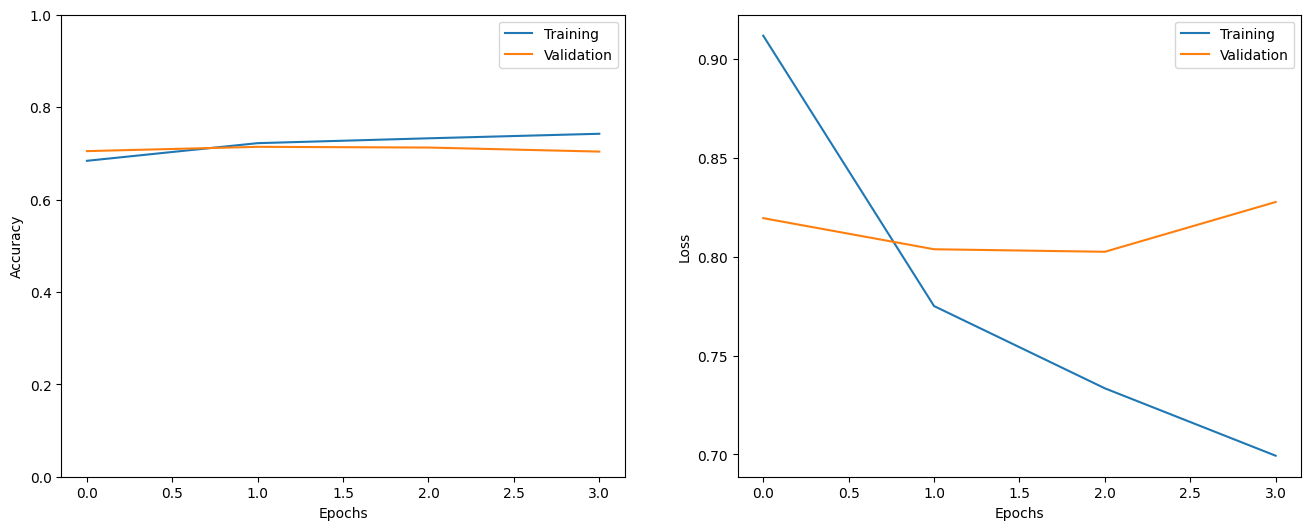

In [129]:
show_history(h)

In [121]:
test_reviews = amazon_data_test['content']
test_sequences = get_sequences(tokenizer, test_reviews.fillna(''))
test_labels = np.array([class_to_index[score] for score in test_classes_numeric])

In [128]:
_= model.evaluate(test_sequences, test_labels, verbose=0)

In [130]:
i = random.randint(0, len(test_reviews) - 1)

print("Review:", test_reviews.iloc[i])
print("Label:", test_labels[i])

p = model.predict(np.expand_dims(test_sequences[i], axis=0))[0]

Review: Amazon is good & fast delivery
Label: 4
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


In [131]:
print("Shape of padded_test_amazon_reviews:", padded_test_amazon_reviews.shape)
print("Shape of test_classes_numeric:", test_classes_numeric.shape)

Shape of padded_test_amazon_reviews: (15426, 130)
Shape of test_classes_numeric: (15426,)


In [132]:
import numpy as np

single_test_sequence = np.expand_dims(test_sequences[i], axis=0)
print("Shape of single_test_sequence:", single_test_sequence.shape)

Shape of single_test_sequence: (1, 130)


In [133]:
p = model.predict(single_test_sequence)[0]

print("Predicted probabilities:", p)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
Predicted probabilities: [0.00334798 0.00135651 0.00778395 0.08139235 0.9061192 ]


In [136]:
predicted_class = np.argmax(p)
print("Predicted class:", predicted_class)

Predicted class: 4


483/483 ━━━━━━━━━━━━━━━━━━━━ 19s 37ms/step


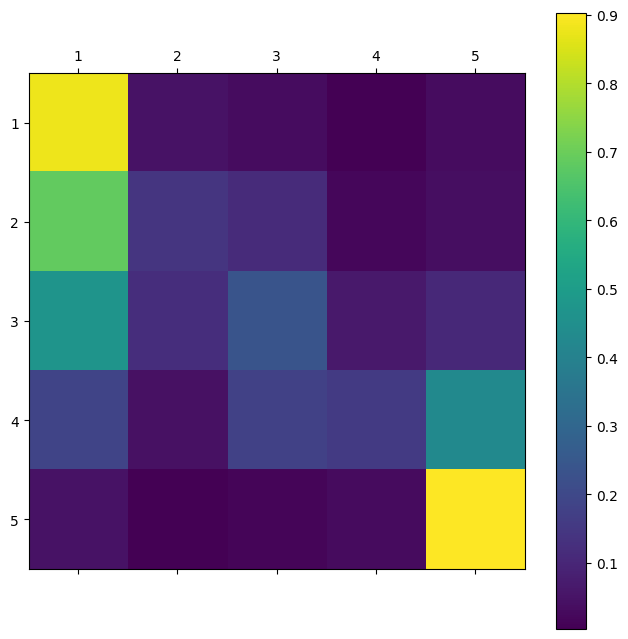

In [137]:
show_confusion_matrix(test_labels, np.argmax(model.predict(test_sequences), axis=1), list(class_to_index.keys()))